## Unit 7 | Assignment - Distinguishing Sentiments

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose __one__ of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


Hints, requirements, and considerations:

* Your bot should scan your account every __five minutes__ for mentions.
* Your bot should pull 500 most recent tweets to analyze for each incoming request.
* Your script should prevent abuse by analyzing __only__ Twitter accounts that have not previously been analyzed.
* Your plot should include meaningful legend and labels.
* It should also mention the Twitter account name of the requesting user.
* When submitting your assignment, be sure to have at least __three__ analyses tweeted out from your account (enlist the help of classmates, friends, or family, if necessary!).
* Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, TextBlob, and Seaborn.
* You may find it helpful to organize your code in function(s), then call them.
* If you're not yet familiar with creating functions in Python, here is a tutorial you may wish to consult: [https://www.tutorialspoint.com/python/python_functions.htm](https://www.tutorialspoint.com/python/python_functions.htm).

In [119]:
# Dependencies
import json
import tweepy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import time

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "DA2k1ReV2TXlW3eX16CeKij4U"
consumer_secret = "xH9OkS7pQlZdXf5jDS6N1VPnZIVamGAqVf59PV5gHWqIGb77s7"
access_token = "2196819717-1QvPl73C8pElfU5DgJNeZMdjwL0IUb75Y4fDwRV"
access_token_secret = "2nbv1oIPXwIjysFlJGzUta7lci0aMkt9oygkJAzlWBKT9"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [120]:
# Target Accounts
target_user1 = "@foxnews" #,"@msnbc","@cnn","@bbc","@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments1 = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        name = "Fox News"
        
        # Add sentiments for each tweet into an array
        sentiments1.append({"Media Source": name,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
 
        # Add to counter 
        counter = counter + 1

 #       # Print Analysis
 #       print(f"Compound Score: {compound}")
 #       print(f"Positive Score: {pos}")
 #       print(f"Neutral Score: {neu}")
 #       print(f"Negative Score: {neg}")

# Convert sentiments to DataFrame
sentiments1_pd = pd.DataFrame.from_dict(sentiments1)
sentiments1_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,-0.5574,Tue Mar 20 20:54:42 +0000 2018,Fox News,0.833,0.167,0.000,1
1,-0.2023,Tue Mar 20 20:44:34 +0000 2018,Fox News,0.859,0.141,0.000,2
2,0.0000,Tue Mar 20 20:27:08 +0000 2018,Fox News,1.000,0.000,0.000,3
3,-0.3400,Tue Mar 20 20:24:28 +0000 2018,Fox News,0.876,0.124,0.000,4
4,-0.0772,Tue Mar 20 20:15:04 +0000 2018,Fox News,0.738,0.141,0.121,5


In [121]:
# Target Accounts
target_user2 = "@msnbc" #,"@cnn","@bbc","@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments2 = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user2)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        name = "MSNBC"
        
        # Add sentiments for each tweet into an array
        sentiments2.append({"Media Source": name,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
 
        # Add to counter 
        counter = counter + 1
 
# Convert sentiments to DataFrame
sentiments2_pd = pd.DataFrame.from_dict(sentiments2)
sentiments2_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.1774,Tue Mar 20 20:41:11 +0000 2018,MSNBC,0.711,0.128,0.161,1
1,-0.9403,Tue Mar 20 20:15:10 +0000 2018,MSNBC,0.505,0.495,0.000,2
2,-0.4767,Tue Mar 20 19:45:39 +0000 2018,MSNBC,0.846,0.154,0.000,3
3,-0.2023,Tue Mar 20 19:35:14 +0000 2018,MSNBC,0.762,0.138,0.100,4
4,0.4939,Tue Mar 20 19:30:06 +0000 2018,MSNBC,0.758,0.000,0.242,5


In [122]:
# Target Accounts
target_user3 = "@cnn" #,"@bbc","@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments3 = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user3)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        name = "CNN"
        
        # Add sentiments for each tweet into an array
        sentiments3.append({"Media Source": name,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
 
        # Add to counter 
        counter = counter + 1
 
# Convert sentiments to DataFrame
sentiments3_pd = pd.DataFrame.from_dict(sentiments3)
sentiments3_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.6369,Tue Mar 20 20:51:53 +0000 2018,CNN,0.743,0.0,0.257,1
1,0.5859,Tue Mar 20 20:47:13 +0000 2018,CNN,0.817,0.0,0.183,2
2,0.5267,Tue Mar 20 20:46:28 +0000 2018,CNN,0.793,0.0,0.207,3
3,0.0000,Tue Mar 20 20:36:25 +0000 2018,CNN,1.000,0.0,0.000,4
4,0.0000,Tue Mar 20 20:31:36 +0000 2018,CNN,1.000,0.0,0.000,5


In [123]:
# Target Accounts
target_user4 = "@bbc"

# Counter
counter = 1

# Variables for holding sentiments
sentiments4 = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user4)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        name = "BBC"
        
        # Add sentiments for each tweet into an array
        sentiments4.append({"Media Source": name,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})# Target Accounts
 
        # Add to counter 
        counter = counter + 1
 
# Convert sentiments to DataFrame
sentiments4_pd = pd.DataFrame.from_dict(sentiments4)
sentiments4_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Tue Mar 20 19:48:04 +0000 2018,BBC,1.000,0.000,0.000,1
1,0.0000,Tue Mar 20 19:03:04 +0000 2018,BBC,1.000,0.000,0.000,2
2,-0.3859,Tue Mar 20 18:33:01 +0000 2018,BBC,0.768,0.160,0.071,3
3,0.3400,Tue Mar 20 17:33:03 +0000 2018,BBC,0.738,0.102,0.160,4
4,0.0000,Tue Mar 20 17:03:01 +0000 2018,BBC,1.000,0.000,0.000,5


In [124]:
# Target Accounts
target_user5 = "@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments5 = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user5)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        name = "NYTimes"
        
        # Add sentiments for each tweet into an array
        sentiments5.append({"Media Source": name,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
 
        # Add to counter 
        counter = counter + 1
 
# Convert sentiments to DataFrame
sentiments5_pd = pd.DataFrame.from_dict(sentiments5)
sentiments5_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Tue Mar 20 20:55:09 +0000 2018,NYTimes,1.000,0.000,0.000,1
1,0.1779,Tue Mar 20 20:40:07 +0000 2018,NYTimes,0.914,0.000,0.086,2
2,-0.5574,Tue Mar 20 20:25:03 +0000 2018,NYTimes,0.825,0.175,0.000,3
3,-0.7269,Tue Mar 20 20:18:08 +0000 2018,NYTimes,0.757,0.243,0.000,4
4,0.0000,Tue Mar 20 20:08:04 +0000 2018,NYTimes,1.000,0.000,0.000,5


In [125]:
# Merge dataframes
sentiments12_pd = pd.merge(sentiments1_pd, sentiments2_pd, how="outer", on=None)

sentiments123_pd = pd.merge(sentiments12_pd, sentiments3_pd, how="outer", on=None)

sentiments1234_pd = pd.merge(sentiments123_pd, sentiments4_pd, how="outer", on=None)

combined_sentiments_pd = pd.merge(sentiments1234_pd, sentiments5_pd, how="outer", on=None)

combined_sentiments_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,-0.5574,Tue Mar 20 20:54:42 +0000 2018,Fox News,0.833,0.167,0.000,1
1,-0.2023,Tue Mar 20 20:44:34 +0000 2018,Fox News,0.859,0.141,0.000,2
2,0.0000,Tue Mar 20 20:27:08 +0000 2018,Fox News,1.000,0.000,0.000,3
3,-0.3400,Tue Mar 20 20:24:28 +0000 2018,Fox News,0.876,0.124,0.000,4
4,-0.0772,Tue Mar 20 20:15:04 +0000 2018,Fox News,0.738,0.141,0.121,5


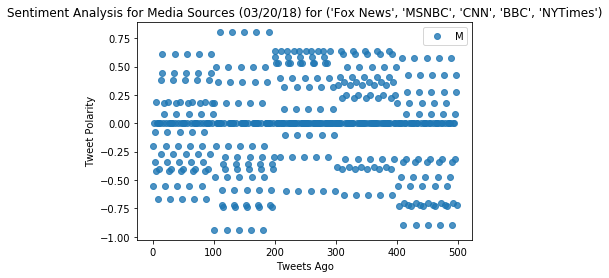

In [126]:
target_users = "Fox News", "MSNBC", "CNN","BBC", "NYTimes"

# Create plot
plt.plot(np.arange(len(combined_sentiments_pd["Compound"])),
         combined_sentiments_pd["Compound"], marker="o", linewidth=0,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis for Media Sources (%s) for %s" % (time.strftime("%x"),target_users))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend ("Media Sources")
plt.show()

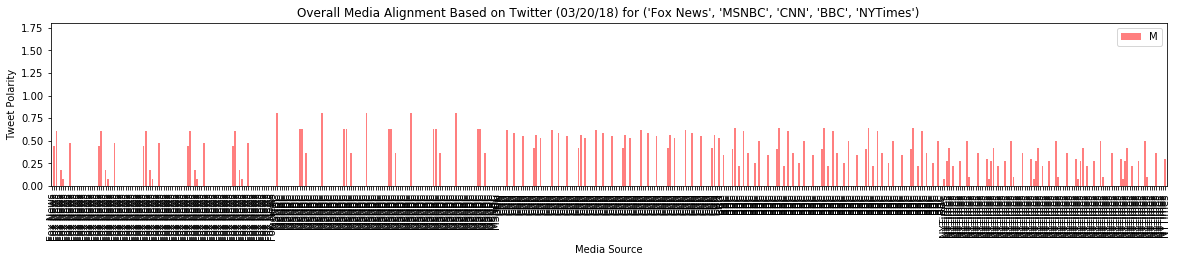

In [106]:
# Set x axis and tick locations
x_axis = np.arange(len(combined_sentiments_pd))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, combined_sentiments_pd["Compound"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_sentiments_pd["Media Source"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(combined_sentiments_pd["Compound"])+1)

# # Incorporate the other graph properties
plt.title("Overall Media Alignment Based on Twitter (%s) for %s" % (time.strftime("%x"),target_users))
plt.ylabel("Tweet Polarity")
plt.xlabel("Media Source")
plt.legend ("Media Sources")
plt.show()

In [128]:
# Export the new CSV
combined_sentiments_pd.to_csv("output/sentiments_df.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'output/sentiments_df.csv'